# Tarea 2: Intro CD, Facultad de Ingeniería, UdelaR
**Pablo Molina,
Joana Auriello**

# **Cargar bibliotecas (dependencias) y df**

In [ ]:
from time import time
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install plotly
import plotly.express as px
from sqlalchemy import create_engine
!pip install pymysql
import pymysql
import seaborn
!pip install pillow
import PIL
!pip install sqlalchemy =<2.0
import sqlalchemy
import re
from sklearn.model_selection import train_test_split
from time import time
from pathlib import Path


from sqlalchemy import create_engine

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 645.8 kB/s eta 0:00:00
/bin/bash: line 1: 2.0: No such file or directory


##Conexion a datos mediante Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Alternativa: conexion de los CSV en la sesion

In [ ]:
# Carga de csv a la session de collab
df_works = pd.read_csv('works.csv')
df_paragraphs = pd.read_csv('paragraphs.csv')
df_characters = pd.read_csv('characters.csv')
df_chapters = pd.read_csv('chapters.csv')

In [ ]:
#Conexion a archivo en drive Pablo
df_works = pd.read_csv("/content/drive/MyDrive/[01] - Pablo/[01].[02] - Facultad/[01].[02].[05] - Master Fing/Intro CD/works.csv")


# Todos los párrafos de todas las obras
df_paragraphs = pd.read_csv("/content/drive/MyDrive/[01] - Pablo/[01].[02] - Facultad/[01].[02].[05] - Master Fing/Intro CD/paragraphs.csv")

# TODO: cargar el resto de las tablas
df_characters = pd.read_csv("/content/drive/MyDrive/[01] - Pablo/[01].[02] - Facultad/[01].[02].[05] - Master Fing/Intro CD/characters.csv")
df_chapters = pd.read_csv("/content/drive/MyDrive/[01] - Pablo/[01].[02] - Facultad/[01].[02].[05] - Master Fing/Intro CD/chapters.csv")


# **Limpieza de Texto**

**Limpieza de datos**

In [ ]:
# Example of a paragraph
df_paragraphs["PlainText"][1]

"If music be the food of love, play on;\nGive me excess of it, that, surfeiting,\nThe appetite may sicken, and so die.\nThat strain again! it had a dying fall:\nO, it came o'er my ear like the sweet sound,\nThat breathes upon a bank of violets,\nStealing and giving odour! Enough; no more:\n'Tis not so sweet now as it was before.\nO spirit of love! how quick and fresh art thou,\nThat, notwithstanding thy capacity\nReceiveth as the sea, nought enters there,\nOf what validity and pitch soe'er,\nBut falls into abatement and low price,\nEven in a minute: so full of shapes is fancy\nThat it alone is high fantastical."

**Signos de puntuacion**

In [ ]:
def clean_text(df, column_name):
    # Convertir todo a minúsculas
    result = df[column_name].str.lower()

    # Quitar signos de puntuación y cambiarlos por espacios (" ")
    punctuation_list = ['[', '\n', ',', '?', '.', '!', ';', ':', ']', '"','#', '$', '%', '&', '(', ')', '*', ',', '-', '.', '/', '<', '>', '?', '^', '_', '`', '|', '~']
    for punc in punctuation_list:
        result = result.str.replace(punc, " ")
    return result

# Creamos una nueva columna CleanText a partir de PlainText
df_paragraphs["CleanText"] = clean_text(df_paragraphs, "PlainText")

# Veamos la diferencia
df_paragraphs[["PlainText", "CleanText"]]

,PlainText,CleanText
0,"[Enter DUKE ORSINO, CURIO, and other Lords; Mu...",enter duke orsino curio and other lords mu...
1,"If music be the food of love, play on;\nGive m...",if music be the food of love play on give me...
2,"Will you go hunt, my lord?",will you go hunt my lord
3,"What, Curio?",what curio
4,The hart.,the hart
...,...,...
35460,"That she is living,\nWere it but told you, sho...",that she is living were it but told you shou...
35461,"You gods, look down\nAnd from your sacred vial...",you gods look down and from your sacred vials...
35462,There's time enough for that;\nLest they desir...,there's time enough for that lest they desire...
35463,"O, peace, Paulina!\nThou shouldst a husband ta...",o peace paulina thou shouldst a husband tak...


**Contracciones en ingles**

In [ ]:
#Contractions dictionary
contractions_dict = {
    "ain't": "are not",
    "'s": " is",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "know'st": "knowest",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "that'd": "that would",
    "that'd've": "that would have",
    "there'd": "there would",
    "there'd've": "there would have",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who've": "who have",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    # Shakespeare-specific contractions
    "thou'rt": "thou art",
    "thou'st": "thou hast",
    "o'er": "over",
    "e'er": "ever",
    "ne'er": "never",
    "i'": "in",
    "a'": "he",
    "gi'": "give",
    "ha'": "have",
    "forget'st": "forgettest"
}

In [ ]:
#funcion para expandir las contracciones, usamos regex
import re

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(re.escape(key) for key in contractions_dict.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contractions_dict.get(match.lower(), match)
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text



In [ ]:
df_paragraphs['CleanText'] = df_paragraphs['CleanText'].astype(str)
# Removemos contracciones
df_paragraphs['expanded_CleanText'] = df_paragraphs['CleanText'].apply(lambda x: expand_contractions(x, contractions_dict))

# Convierte párrafos en listas "palabra1 palabra2 palabra3" -> ["palabra1", "palabra2", "palabra3"]
df_paragraphs["WordList"] = df_paragraphs["CleanText"].str.split()

# Veamos la nueva columna creada
# Notar que a la derecha tenemos una lista: [palabra1, palabra2, palabra3]
df_paragraphs[["CleanText", "WordList"]]

,CleanText,WordList
0,enter duke orsino curio and other lords mu...,"[enter, duke, orsino, curio, and, other, lords..."
1,if music be the food of love play on give me...,"[if, music, be, the, food, of, love, play, on,..."
2,will you go hunt my lord,"[will, you, go, hunt, my, lord]"
3,what curio,"[what, curio]"
4,the hart,"[the, hart]"
...,...,...
35460,that she is living were it but told you shou...,"[that, she, is, living, were, it, but, told, y..."
35461,you gods look down and from your sacred vials...,"[you, gods, look, down, and, from, your, sacre..."
35462,there's time enough for that lest they desire...,"[there's, time, enough, for, that, lest, they,..."
35463,o peace paulina thou shouldst a husband tak...,"[o, peace, paulina, thou, shouldst, a, husband..."


In [ ]:
# Nuevo dataframe: cada fila ya no es un párrafo, sino una sóla palabra
df_words = df_paragraphs.explode("WordList")

# Quitamos estas columnas redundantes
df_words.drop(columns=["CleanText", "PlainText"], inplace=True)

# Renombramos la columna WordList -> word
df_words.rename(columns={"WordList": "word"}, inplace=True)

# Verificar que el número de filas es mucho mayor
df_words
df_words_copy = df_words.copy()

# **Parte 1 - Procesamiento Lenguaje Natural**

### **Parte 1.1 - dataset 3 personajes, separamos train y test**

In [ ]:
# Agregamos personajes, obras y géneros en el mismo dataset
df_dataset = df_paragraphs.merge(df_chapters.set_index("id")["work_id"], left_on="chapter_id", right_index=True)
df_dataset = df_dataset.merge(df_works.set_index("id")[["Title", "GenreType"]], left_on="work_id", right_index=True)
df_dataset = df_dataset.merge(df_characters.set_index('id')["CharName"], left_on="character_id", right_index=True).sort_index()
df_dataset = df_dataset[["CleanText", "CharName", "Title", "GenreType"]]

#creo una copia de df_dataset para la parte 2
df_dataset_copy = df_dataset.copy()

# Usaremos sólo estos personajes
characters = ["Antony", "Cleopatra", "Queen Margaret"]
df_dataset = df_dataset[df_dataset["CharName"].isin(characters)]

df_dataset

,CleanText,CharName,Title,GenreType
2058,if it be love indeed tell me how much,Cleopatra,Antony and Cleopatra,Tragedy
2059,there's beggary in the love that can be reckon'd,Antony,Antony and Cleopatra,Tragedy
2060,i'll set a bourn how far to be beloved,Cleopatra,Antony and Cleopatra,Tragedy
2061,then must thou needs find out new heaven new ...,Antony,Antony and Cleopatra,Tragedy
2064,grates me the sum,Antony,Antony and Cleopatra,Tragedy
...,...,...,...,...
27583,thou hadst a clarence too and richard kill'd ...,Queen Margaret,Richard III,History
27585,bear with me i am hungry for revenge and now...,Queen Margaret,Richard III,History
27587,i call'd thee then vain flourish of my fortune...,Queen Margaret,Richard III,History
27589,forbear to sleep the nights and fast the days...,Queen Margaret,Richard III,History


In [ ]:
# Párrafos por cada personaje seleccionado
df_dataset["CharName"].value_counts()

CharName
Antony            253
Cleopatra         204
Queen Margaret    169
Name: count, dtype: int64

 **Dataset y Features de texto**

In [ ]:
X = df_dataset["CleanText"].to_numpy()
y = df_dataset["CharName"].to_numpy()

In [ ]:
# Partir train/test 30% estratificados
# -> Definir X_train, X_test, y_train, y_test

# X_train, X_test, y_train, y_test = ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state = 42)

print(f"Tamaños de Train/Test: {len(X_train)}/{len(X_test)}")

Tamaños de Train/Test: 438/188


## **Parte 1.2 - balance en train y test**

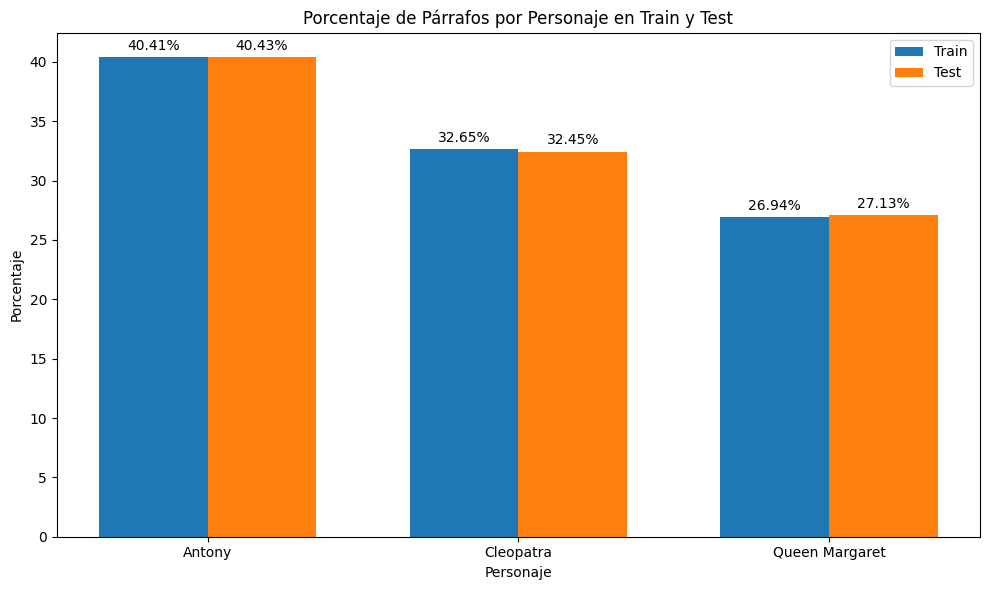

In [ ]:
#Viz que permita verificar que el balance de parrafos de cada personaje es similar en train y test
# Contamos el número de ocurrencias de cada personaje en los conjuntos de entrenamiento y prueba
train_counts = np.array([(y_train == char).sum() for char in characters])
test_counts = np.array([(y_test == char).sum() for char in characters])

# Calculamos los porcentajes
train_percentages = (train_counts / train_counts.sum()) * 100
test_percentages = (test_counts / test_counts.sum()) * 100

# Creación de la visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Datos para la visualización
labels = characters
x = np.arange(len(labels))  # Posición de los labels
width = 0.35  # Ancho de las barras

# Barras para train y test
rects1 = ax.bar(x - width/2, train_percentages, width, label='Train')
rects2 = ax.bar(x + width/2, test_percentages, width, label='Test')

# Añadimos etiquetas, título y leyenda
ax.set_xlabel('Personaje')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de Párrafos por Personaje en Train y Test')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Añadimos las etiquetas encima de las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de offset vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


## **Parte 1.3 - Bag of Words**

Bag of Words: Explique como funciona y muestre un ejemplo

La técnica `Bag of Words` convierte el texto a una representación numérica mediante la tokenización, construcción de un vocabulario y conteo de palabras. La matriz resultante es grande pero dispersa (`Sparse Matrix`) debido a la gran cantidad de ceros, ya que no todas las palabras aparecen en cada documento. El uso de matrices dispersas es crucial para manejar eficientemente el espacio y el tiempo de computación. Si no utilizáramos matrices dispersas, necesitaríamos mucha más memoria RAM para almacenar grandes matrices llenas de ceros, lo cual no es práctico.


In [ ]:
#Ejemplo
# Definimos nuestros textos
texts = [
    "El gato se sienta en la ventana",
    "El perro ladra en la casa",
    "El gato y el perro son amigos"
]

In [ ]:
# Inicializamos el CountVectorizer
count_vect = CountVectorizer()

# Ajustamos y transformamos los textos
X_train_counts = count_vect.fit_transform(texts)

# Obtenemos el vocabulario
vocab = count_vect.get_feature_names_out()

# Convertimos la matriz de conteos a un DataFrame para una visualización más clara
df_counts = pd.DataFrame(X_train_counts.toarray(), columns=vocab)

# Imprimimos el DataFrame de conteos
print("Vocabulario:", vocab)
print(df_counts)

Vocabulario: ['amigos' 'casa' 'el' 'en' 'gato' 'la' 'ladra' 'perro' 'se' 'sienta' 'son'
 'ventana']
   amigos  casa  el  en  gato  la  ladra  perro  se  sienta  son  ventana
0       0     0   1   1     1   1      0      0   1       1    0        1
1       0     1   1   1     0   1      1      1   0       0    0        0
2       1     0   2   0     1   0      0      1   0       0    1        0


## **Parte 1.4 - TF-IDF**

In [ ]:
#seguimos ejemplificando con los textos de ejemplo
# Inicializamos el CountVectorizer para bigramas
count_vect = CountVectorizer(ngram_range=(1, 2))

# Ajustamos y transformamos los textos
X_train_counts = count_vect.fit_transform(texts)

# Inicializamos el TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Ajustamos y transformamos los datos a TF-IDF
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Convertimos la matriz TF-IDF a un DataFrame para una visualización más clara
vocab = count_vect.get_feature_names_out()
df_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vocab)

# Imprimimos el DataFrame de TF-IDF
print("Vocabulario con Bigramas:", vocab)
print(df_tfidf)

Vocabulario con Bigramas: ['amigos' 'casa' 'el' 'el gato' 'el perro' 'en' 'en la' 'gato' 'gato el'
 'gato se' 'la' 'la casa' 'la ventana' 'ladra' 'ladra en' 'perro'
 'perro ladra' 'perro son' 'se' 'se sienta' 'sienta' 'sienta en' 'son'
 'son amigos' 'ventana']
     amigos      casa        el   el gato  el perro        en     en la  \
0  0.000000  0.000000  0.184560  0.237655  0.000000  0.237655  0.237655   
1  0.000000  0.348349  0.205741  0.000000  0.264928  0.264928  0.264928   
2  0.338858  0.000000  0.400270  0.257710  0.257710  0.000000  0.000000   

       gato   gato el   gato se  ...     perro  perro ladra  perro son  \
0  0.237655  0.000000  0.312487  ...  0.000000     0.000000   0.000000   
1  0.000000  0.000000  0.000000  ...  0.264928     0.348349   0.000000   
2  0.257710  0.338858  0.000000  ...  0.257710     0.000000   0.338858   

         se  se sienta    sienta  sienta en       son  son amigos   ventana  
0  0.312487   0.312487  0.312487   0.312487  0.000000    0.0000

El resultado muestra un vocabulario que incluye unigramas y bigramas, y la matriz TF-IDF que pondera cada n-grama en los documentos. La transformación TF-IDF pondera las palabras y n-gramas en función de su importancia. Las palabras que son comunes en muchos documentos reciben una puntuación más baja, mientras que las palabras que son más distintivas para un documento reciben una puntuación más alta. Esto ayuda a resaltar las características más relevantes del texto para tareas como clasificación y recuperación de información.

**Conteo de palabras y TF-IDF**

In [ ]:
# Inicializamos el CountVectorizer
count_vect = CountVectorizer(stop_words=None, ngram_range=(1, 1))

# Ajustamos y transformamos los datos de entrenamiento
X_train_counts = count_vect.fit_transform(X_train)

# Inicializamos el TfidfTransformer sin usar IDF
tf_idf = TfidfTransformer(use_idf=False)

# Ajustamos y transformamos los datos de entrenamiento a TF
X_train_tf = tf_idf.fit_transform(X_train_counts)

print(X_train_counts)
print(X_train_tf)

  (0, 2428)	1
  (0, 2799)	1
  (0, 199)	1
  (0, 2366)	1
  (0, 2434)	1
  (0, 1602)	1
  (0, 118)	1
  (0, 1046)	1
  (0, 1630)	1
  (0, 707)	1
  (0, 1177)	1
  (0, 2479)	1
  (0, 569)	1
  (1, 2662)	1
  (1, 1091)	1
  (1, 1612)	1
  (1, 1125)	1
  (2, 2799)	1
  (2, 340)	1
  (2, 665)	1
  (2, 220)	1
  (2, 2791)	1
  (2, 326)	1
  (2, 2444)	1
  (2, 1233)	1
  :	:
  (436, 2024)	1
  (436, 2735)	1
  (436, 1835)	1
  (436, 984)	1
  (436, 2484)	1
  (436, 1052)	1
  (436, 1876)	1
  (436, 1706)	1
  (436, 187)	1
  (436, 244)	1
  (436, 927)	1
  (436, 1841)	1
  (436, 1538)	1
  (436, 262)	1
  (436, 980)	1
  (436, 213)	1
  (436, 1509)	1
  (437, 1233)	1
  (437, 1139)	1
  (437, 1553)	1
  (437, 1390)	1
  (437, 2714)	1
  (437, 1398)	1
  (437, 40)	1
  (437, 763)	1
  (0, 118)	0.2773500981126146
  (0, 199)	0.2773500981126146
  (0, 569)	0.2773500981126146
  (0, 707)	0.2773500981126146
  (0, 1046)	0.2773500981126146
  (0, 1177)	0.2773500981126146
  (0, 1602)	0.2773500981126146
  (0, 1630)	0.2773500981126146
  (0, 2366)	0.2773

In [ ]:
#tf-idf en nuestro train
# Inicializamos el CountVectorizer
count_vect = CountVectorizer(stop_words=None, ngram_range=(1, 1))

# Ajustamos y transformamos los datos de entrenamiento
X_train_counts = count_vect.fit_transform(X_train)

# Inicializamos el TfidfTransformer usando IDF
tf_idf = TfidfTransformer(use_idf=True)

# Ajustamos y transformamos los datos de entrenamiento a TF-IDF
X_train_tfidf = tf_idf.fit_transform(X_train_counts)

# Convertimos la matriz TF-IDF a un DataFrame para una visualización más clara
vocab = count_vect.get_feature_names_out()
df_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=vocab)

# Mostramos una muestra de la representación TF-IDF
print("Vocabulario:", vocab)
print("Matriz TF-IDF (muestra):")
print(df_tfidf.head())  # Muestra las primeras 5 filas

Vocabulario: ['abhorring' 'abides' 'abjects' ... 'yourself' 'yourselves' 'youth']
Matriz TF-IDF (muestra):
   abhorring  abides  abjects  abode  about  abroad  absence  abused  abysm  \
0        0.0     0.0      0.0    0.0    0.0     0.0      0.0     0.0    0.0   
1        0.0     0.0      0.0    0.0    0.0     0.0      0.0     0.0    0.0   
2        0.0     0.0      0.0    0.0    0.0     0.0      0.0     0.0    0.0   
3        0.0     0.0      0.0    0.0    0.0     0.0      0.0     0.0    0.0   
4        0.0     0.0      0.0    0.0    0.0     0.0      0.0     0.0    0.0   

   accident  ...  york  yorks       you  young  younger  your  yours  \
0       0.0  ...   0.0    0.0  0.140387    0.0      0.0   0.0    0.0   
1       0.0  ...   0.0    0.0  0.000000    0.0      0.0   0.0    0.0   
2       0.0  ...   0.0    0.0  0.219896    0.0      0.0   0.0    0.0   
3       0.0  ...   0.0    0.0  0.000000    0.0      0.0   0.0    0.0   
4       0.0  ...   0.0    0.0  0.000000    0.0      0.0   

In [ ]:
# Ver las dimensiones de la matriz TF-IDF
print("Dimensiones de la matriz TF-IDF:", X_train_tfidf.shape)

Dimensiones de la matriz TF-IDF: (438, 2807)


## **Parte 1.5 - PCA**

Seleccionamos n-grama(1,1) - tomamos cada palabra individualmente. La dimension final de la matrix es 438x2807, el vocabulario final es de 2807 palabras unicas. A continuacion aplicamos PCA para reducir los vectores (cada uno contiene 2807 elementos) a dimension 2. Nuestra matriz de entrenamiento despues de PCA deberia tener 438x2

**Reducción de dimensionalidad - PCA**

Primero realizamos PCA sobre los datos de entrenamiento, 2 componentes

In [ ]:
 # Realizar PCA sobre los datos de entrenamiento
from sklearn.decomposition import PCA
# Aplicamos PCA para reducir las dimensiones a las dos primeras componentes principales
reductor = PCA(n_components=2)

# Transformar train
X_train_red = reductor.fit_transform(X_train_tfidf.toarray())

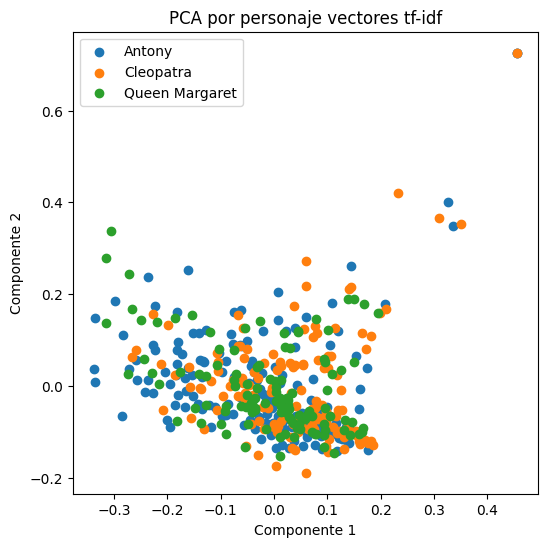

In [ ]:
# Visualización de las dos primeras componentes de PCA
fig, ax = plt.subplots(figsize=(6, 6))
for character in np.unique(y_train):
    mask_train = y_train == character
    ax.scatter(X_train_red[mask_train, 0], X_train_red[mask_train, 1], label=character)

ax.set_title("PCA por personaje vectores tf-idf")
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.legend()

Segundo realizamos PCA filtrando las stop words en ingles y con use_idf=true y ngram_range=(1,2)

In [ ]:
# Inicializamos el CountVectorizer con stop_words en inglés y rango de n-gramas (1,2)
count_vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))

# Ajustamos y transformamos los datos de entrenamiento
X_train_counts = count_vect.fit_transform(X_train)

# Inicializamos el TfidfTransformer usando IDF
tf_idf = TfidfTransformer(use_idf=True)

# Ajustamos y transformamos los datos de entrenamiento a TF-IDF
X_train_tfidf_filtered = tf_idf.fit_transform(X_train_counts)



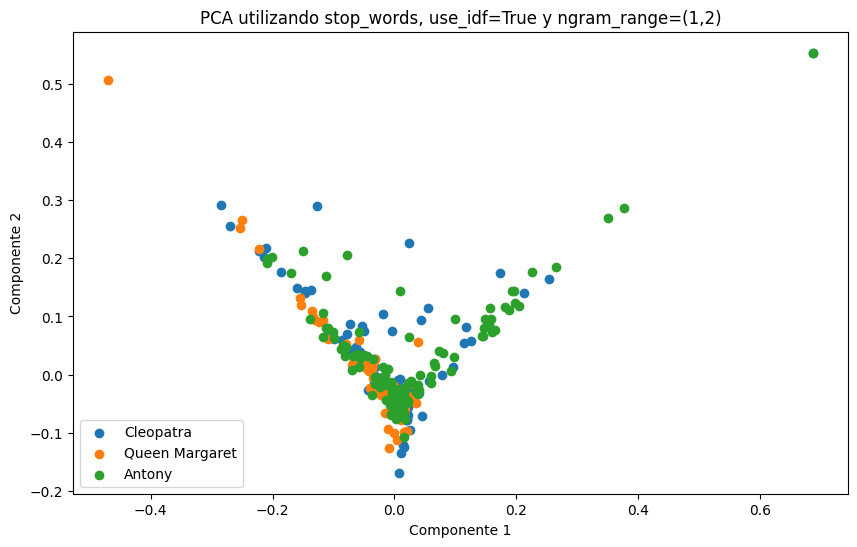

In [ ]:
# Aplicamos PCA para reducir las dimensiones a las dos primeras componentes principales
pca_filtered = PCA(n_components=2)
X_train_pca_filtered = pca_filtered.fit_transform(X_train_tfidf_filtered.toarray())

# Convertimos las dos primeras componentes a un DataFrame para facilitar la visualización
df_pca_filtered = pd.DataFrame(X_train_pca_filtered, columns=['PCA1', 'PCA2'])
df_pca_filtered['Character'] = y_train

# Visualizamos los datos en un mapa de dispersión
plt.figure(figsize=(10, 6))
for character in set(y_train):
    subset = df_pca_filtered[df_pca_filtered['Character'] == character]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=character)

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA utilizando stop_words, use_idf=True y ngram_range=(1,2)')
plt.legend()
plt.show()

Variacion de la varianza explicada por componente (10 componentes)

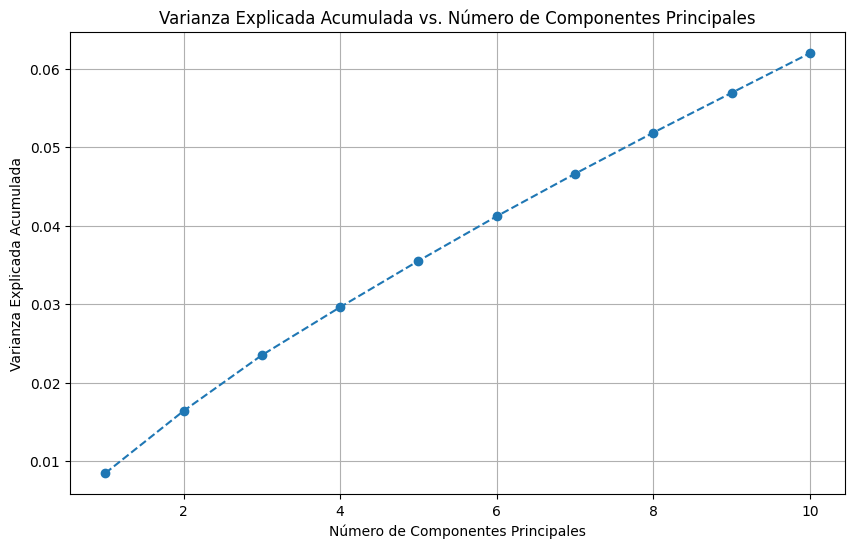

In [ ]:
# Aplicamos PCA con hasta 10 componentes
pca_full = PCA(n_components=10)
X_train_pca_full = pca_full.fit_transform(X_train_tfidf_filtered.toarray())

# Visualizamos la variación de la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), pca_full.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes Principales')
plt.grid(True)
plt.show()

# **Parte 1:Camino alternativo: seleccionamos hamlet, iago, juliet como chars**

In [ ]:
# Hamlet id 559
# Iago id 600
# Juliet 622
#Lo raro que hay dos Julietas de obras distintas
ids = [559, 600, 622]
df_filter_bychar = df_words_complete[df_words_complete['character_id'].isin(ids)]
df_filter_bychar

,Unnamed: 0,pharagraph_id,ParagraphNum,character_id,chapter_id,expanded_plaintext,expanded_CleanText,word,CharName,Act,Scene,work_id,Title,Date,GenreType
162857,7202,638065,270,559,18876,"[aside] A little more than kin, and less than ...",aside a little more than kin and less than ...,aside,Hamlet,1,2,8,Hamlet,1600,Tragedy
162858,7202,638065,270,559,18876,"[aside] A little more than kin, and less than ...",aside a little more than kin and less than ...,a,Hamlet,1,2,8,Hamlet,1600,Tragedy
162859,7202,638065,270,559,18876,"[aside] A little more than kin, and less than ...",aside a little more than kin and less than ...,little,Hamlet,1,2,8,Hamlet,1600,Tragedy
162860,7202,638065,270,559,18876,"[aside] A little more than kin, and less than ...",aside a little more than kin and less than ...,more,Hamlet,1,2,8,Hamlet,1600,Tragedy
162861,7202,638065,270,559,18876,"[aside] A little more than kin, and less than ...",aside a little more than kin and less than ...,than,Hamlet,1,2,8,Hamlet,1600,Tragedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694612,28837,659700,3165,622,19378,"Yea, noise? then I'll be brief. O happy dagger...",yea noise then i'll be brief o happy dagger...,rust,Juliet,5,3,34,Romeo and Juliet,1594,Tragedy
694613,28837,659700,3165,622,19378,"Yea, noise? then I'll be brief. O happy dagger...",yea noise then i'll be brief o happy dagger...,and,Juliet,5,3,34,Romeo and Juliet,1594,Tragedy
694614,28837,659700,3165,622,19378,"Yea, noise? then I'll be brief. O happy dagger...",yea noise then i'll be brief o happy dagger...,let,Juliet,5,3,34,Romeo and Juliet,1594,Tragedy
694615,28837,659700,3165,622,19378,"Yea, noise? then I'll be brief. O happy dagger...",yea noise then i'll be brief o happy dagger...,me,Juliet,5,3,34,Romeo and Juliet,1594,Tragedy


In [ ]:
df_filter_bychar.drop(['expanded_plaintext','expanded_CleanText'],axis=1, inplace=True)

<ipython-input-17-42b1eb148c4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_bychar.drop(['expanded_plaintext','expanded_CleanText'],axis=1, inplace=True)


In [ ]:
#Separo train y test, todavia no se cual va a ser mi variable a explicar
train_df, test_df = train_test_split(df_filter_bychar, test_size=0.3, random_state=42, stratify=df_filter_bychar['CharName'])
test_df, val_df = train_test_split(test_df, test_size=0.3, random_state=42, stratify=test_df['CharName'])
train_df

,Unnamed: 0,pharagraph_id,ParagraphNum,character_id,chapter_id,word,CharName,Act,Scene,work_id,Title,Date,GenreType
688715,28619,659482,2376,622,19370,henceforth,Juliet,3,5,34,Romeo and Juliet,1594,Tragedy
574111,23668,654531,10,600,19243,epithets,Iago,1,1,27,Othello,1604,Tragedy
180539,7941,638804,2705,559,18887,countenance,Hamlet,4,2,8,Hamlet,1600,Tragedy
179298,7910,638773,2571,559,18885,and,Hamlet,3,4,8,Hamlet,1600,Tragedy
176751,7833,638696,2262,559,18883,cloud,Hamlet,3,2,8,Hamlet,1600,Tragedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165524,7325,638188,722,559,18878,lets,Hamlet,1,4,8,Hamlet,1600,Tragedy
173376,7667,638530,1758,559,18882,life,Hamlet,3,1,8,Hamlet,1600,Tragedy
591749,24424,655287,2562,600,19253,shall,Iago,4,1,27,Othello,1604,Tragedy
179508,7912,638775,2596,559,18885,call,Hamlet,3,4,8,Hamlet,1600,Tragedy


In [ ]:
train_df_paragrafp = train_df[['CharName','pharagraph_id']].reset_index()
train_df_paragrafp2 = train_df_paragrafp.drop_duplicates(subset=['CharName','pharagraph_id'])

test_df_paragrafp = test_df[['CharName','pharagraph_id']].reset_index()
test_df_paragrafp2 = test_df_paragrafp.drop_duplicates(subset=['CharName','pharagraph_id'])


  Character  Paragraphs
0    Hamlet         352
1      Iago         269
2    Juliet         117


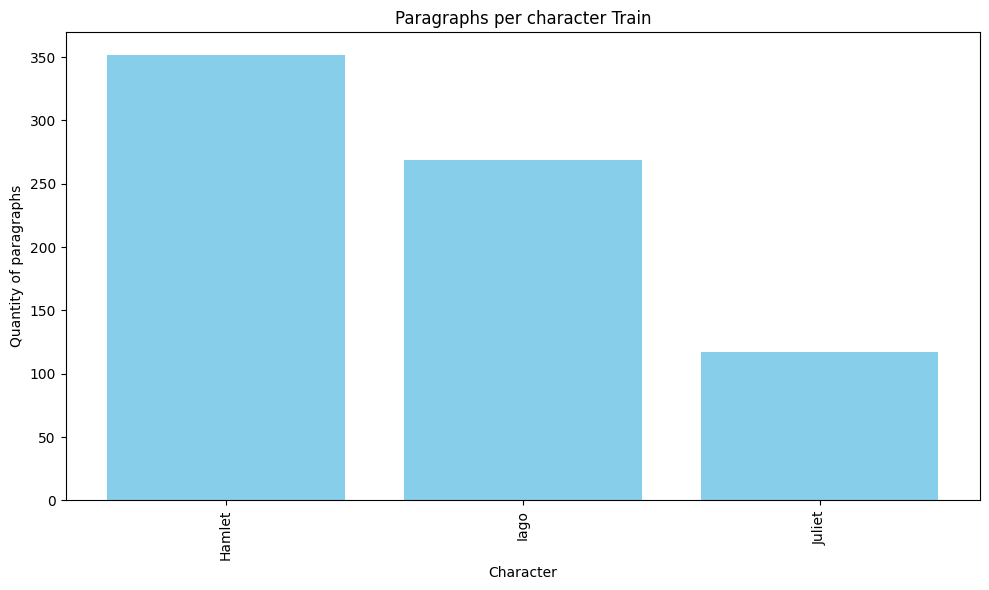

In [ ]:
# Agrupamos por character name y contamos el numero de parrafos
paragraphs_per_character_train = train_df_paragrafp2.groupby(['CharName'])['pharagraph_id'].count().reset_index()
paragraphs_per_character_train.columns = ['Character', 'Paragraphs']

# Ordenamos el df por el numero de parrafos de forma descendiente
paragraphs_per_character_train = paragraphs_per_character_train.sort_values(by='Paragraphs', ascending=False)

#Mostramos la tabla
print(paragraphs_per_character_train)

# Ploteamos el top 10 characters por cantidad de parrafos
top_10_characters_train = paragraphs_per_character_train.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_characters_train['Character'], top_10_characters_train['Paragraphs'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Character')
plt.ylabel('Quantity of paragraphs')
plt.title('Paragraphs per character Train')
plt.tight_layout()
plt.show()


  Character  Paragraphs
0    Hamlet         311
1      Iago         231
2    Juliet         104


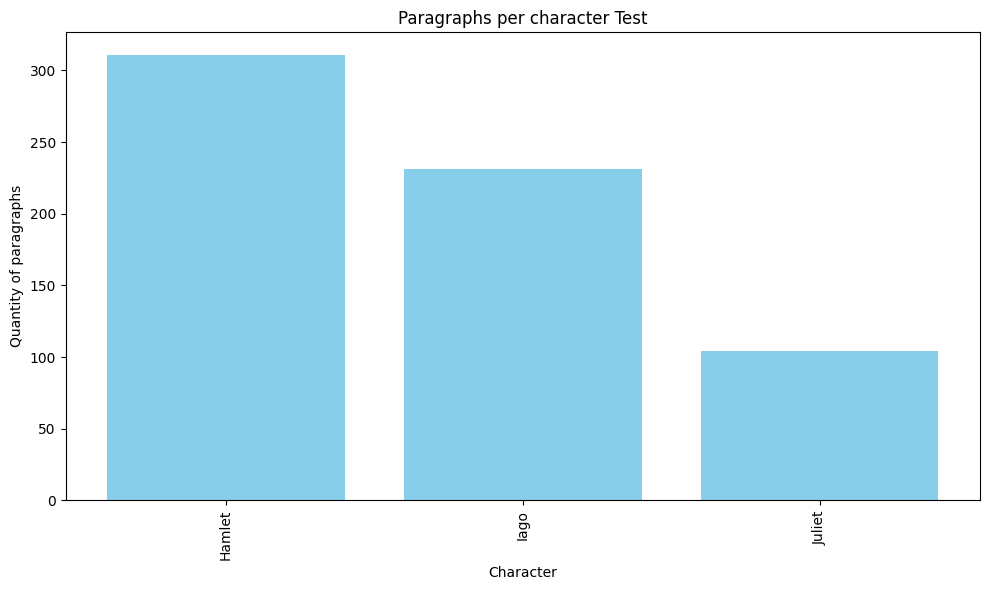

In [ ]:
# Agrupamos por character name y contamos el numero de parrafos
paragraphs_per_character_test = test_df_paragrafp2.groupby(['CharName'])['pharagraph_id'].count().reset_index()
paragraphs_per_character_test.columns = ['Character', 'Paragraphs']

# Ordenamos el df por el numero de parrafos de forma descendiente
paragraphs_per_character_test = paragraphs_per_character_test.sort_values(by='Paragraphs', ascending=False)

#Mostramos la tabla
print(paragraphs_per_character_test)

# Ploteamos el top 10 characters por cantidad de parrafos
top_10_characters_test = paragraphs_per_character_test.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_characters_test['Character'], top_10_characters_test['Paragraphs'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Character')
plt.ylabel('Quantity of paragraphs')
plt.title('Paragraphs per character Test')
plt.tight_layout()
plt.show()

In [ ]:
#Split between X and y
X_test = test_df["word"].to_numpy()
y_test = test_df["CharName"].to_numpy()

X_train = train_df["word"].to_numpy()
y_train = train_df["CharName"].to_numpy()

X_val = val_df["word"].to_numpy()
y_val = val_df["CharName"].to_numpy()

In [ ]:
#Conteo de palabras y TF-IDF
count_vect = CountVectorizer(stop_words=None, ngram_range=(1,1))
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts

count_vect = CountVectorizer(stop_words=None, ngram_range=(1,1))
X_test_counts = count_vect.fit_transform(X_test)
X_test_counts

count_vect = CountVectorizer(stop_words=None, ngram_range=(1,1))
X_val_counts = count_vect.fit_transform(X_val)
X_val_counts


<2230x818 sparse matrix of type '<class 'numpy.int64'>'
	with 2138 stored elements in Compressed Sparse Row format>

In [ ]:
tf_idf = TfidfTransformer(use_idf=False)
X_train_tf = tf_idf.fit_transform(X_train_counts)
#X_train_tf

tf_idf = TfidfTransformer(use_idf=False)
X_test_tf = tf_idf.fit_transform(X_test_counts)

tf_idf = TfidfTransformer(use_idf=False)
X_val_tf = tf_idf.fit_transform(X_val_counts)

## Parte 1.5 - PCA


In [ ]:
# TODO: Realizar PCA sobre los datos de entrenamiento
from sklearn.decomposition import PCA

# reductor = ...
n_components = 2
reducer = PCA(n_components=n_components)
reductor = reducer.fit(X_train_tf.toarray())

# Transformar train
X_train_red = reductor.fit_transform(X_train_tf.toarray())

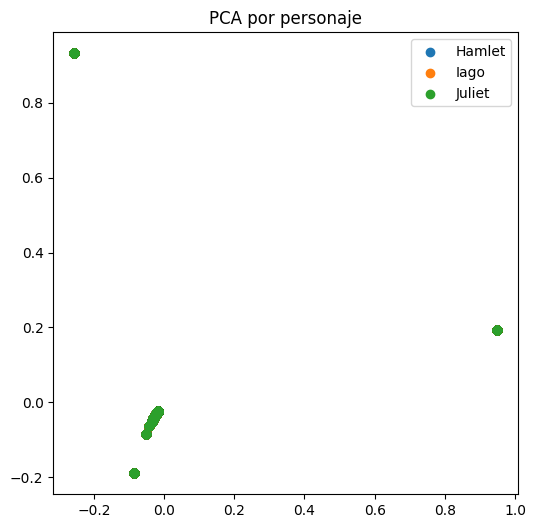

In [ ]:
# Visualización de las dos primeras componentes de PCA
fig, ax = plt.subplots(figsize=(6, 6))
for character in np.unique(y_train):
    mask_train = y_train == character
    ax.scatter(X_train_red[mask_train, 0], X_train_red[mask_train, 1], label=character)

ax.set_title("PCA por personaje")
ax.legend()

# **Parte 2 - Modelos de Clasificación**

##Parte 2.1 - Multinomial Naive Bayes

**Entrenamiento del modelo MNB**

In [ ]:
 # Entrenar el modelo Multinomial Naive Bayes
bayes_clf = MultinomialNB()
bayes_clf.fit(X_train_tfidf_filtered, y_train)

# Ver las primeras 10 predicciones de train
y_pred_train = bayes_clf.predict(X_train_tfidf_filtered)
y_pred_train[:10]

array(['Queen Margaret', 'Antony', 'Cleopatra', 'Antony', 'Cleopatra',
       'Cleopatra', 'Antony', 'Cleopatra', 'Antony', 'Antony'],
      dtype='<U14')

In [ ]:
def get_accuracy(y_true, y_pred):
    return (y_true == y_pred).sum() / len(y_true)

get_accuracy(y_train, y_pred_train)

0.9634703196347032

**Precedimos para test y observamos matriz confusion**

In [ ]:
 # Predecir para test y ver la matriz de confusión, y reportar accuracy
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
# Predecir sobre el conjunto de test
X_test_counts = count_vect.transform(X_test)
X_test_tfidf_filtered = tf_idf.transform(X_test_counts)
y_pred = bayes_clf.predict(X_test_tfidf_filtered)

# Calcular el valor de accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Accuracy: 0.574468085106383


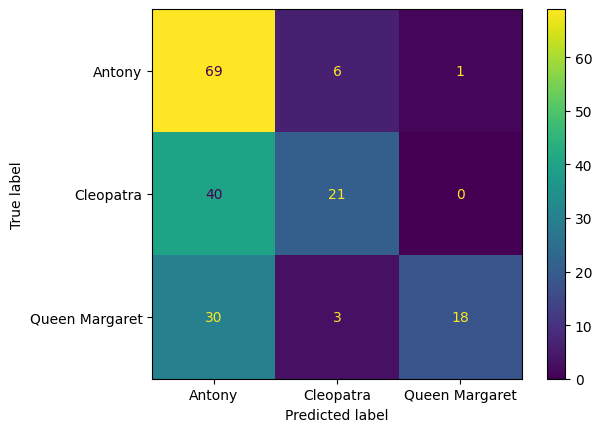

In [ ]:
# Generamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bayes_clf.classes_)
disp.plot()

In [ ]:
# Generar el reporte de clasificación que incluye precision y recall
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=bayes_clf.classes_)
print(report)

                precision    recall  f1-score   support

        Antony       0.50      0.91      0.64        76
     Cleopatra       0.70      0.34      0.46        61
Queen Margaret       0.95      0.35      0.51        51

      accuracy                           0.57       188
     macro avg       0.71      0.54      0.54       188
  weighted avg       0.68      0.57      0.55       188



##Parte 2.2 - Búsqueda de hiper-parámetros con Cross-Validation


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Agregar más variantes de parámetros que les parezcan relevantes
param_sets = [
    {"stop_words": None, "ngram_range": (1, 1), "idf": True},
    {"stop_words": None, "ngram_range": (1, 2), "idf": True},
    {"stop_words": None, "ngram_range": (1, 1), "idf": False},
    {"stop_words": None, "ngram_range": (1, 2), "idf": False},
    {"stop_words": 'english', "ngram_range": (1, 1), "idf": True},
    {"stop_words": 'english', "ngram_range": (1, 2), "idf": True},
    {"stop_words": 'english', "ngram_range": (1, 1), "idf": False},
    {"stop_words": 'english', "ngram_range": (1, 2), "idf": False}
]

skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Usaremos train/validation/test, renombramos train+validation = dev(elopment) dataset
X_dev = X_train
y_dev = y_train

# Para almacenar los resultados
results = []

for params in param_sets:

    # Transformaciones a aplicar (featurizers)
    count_vect = CountVectorizer(stop_words=params["stop_words"], ngram_range=params["ngram_range"])
    tf_idf = TfidfTransformer(use_idf=params["idf"])

    fold_accuracies = []

    for train_idxs, val_idxs in skf.split(X_dev, y_dev):

        # Train y validation para el split actual
        X_train_ = X_dev[train_idxs]
        y_train_ = y_dev[train_idxs]
        X_val = X_dev[val_idxs]
        y_val = y_dev[val_idxs]

        # Ajustamos y transformamos Train
        X_train_counts = count_vect.fit_transform(X_train_)
        X_train_tf = tf_idf.fit_transform(X_train_counts)

        # Entrenamos con Train
        bayes_clf = MultinomialNB()
        bayes_clf.fit(X_train_tf, y_train_)

        # Transformamos Validation
        X_val_counts = count_vect.transform(X_val)
        X_val_tfidf = tf_idf.transform(X_val_counts)

        # Predecimos y evaluamos en Validation
        y_pred_val = bayes_clf.predict(X_val_tfidf)
        acc = accuracy_score(y_val, y_pred_val)
        fold_accuracies.append(acc)
        print(f"{acc=:.4f} {params=}")

    results.append((params, fold_accuracies))

# Imprimir los resultados promedios y la variabilidad
for params, accs in results:
    mean_acc = np.mean(accs)
    std_acc = np.std(accs)
    print(f"Params: {params} | Mean Accuracy: {mean_acc:.4f} | Std: {std_acc:.4f}")


acc=0.4636 params={'stop_words': None, 'ngram_range': (1, 1), 'idf': True}
acc=0.5000 params={'stop_words': None, 'ngram_range': (1, 1), 'idf': True}
acc=0.5505 params={'stop_words': None, 'ngram_range': (1, 1), 'idf': True}
acc=0.4404 params={'stop_words': None, 'ngram_range': (1, 1), 'idf': True}
acc=0.4364 params={'stop_words': None, 'ngram_range': (1, 2), 'idf': True}
acc=0.4909 params={'stop_words': None, 'ngram_range': (1, 2), 'idf': True}
acc=0.5046 params={'stop_words': None, 'ngram_range': (1, 2), 'idf': True}
acc=0.4495 params={'stop_words': None, 'ngram_range': (1, 2), 'idf': True}
acc=0.4364 params={'stop_words': None, 'ngram_range': (1, 1), 'idf': False}
acc=0.4545 params={'stop_words': None, 'ngram_range': (1, 1), 'idf': False}
acc=0.4954 params={'stop_words': None, 'ngram_range': (1, 1), 'idf': False}
acc=0.4220 params={'stop_words': None, 'ngram_range': (1, 1), 'idf': False}
acc=0.4091 params={'stop_words': None, 'ngram_range': (1, 2), 'idf': False}
acc=0.4455 params={'

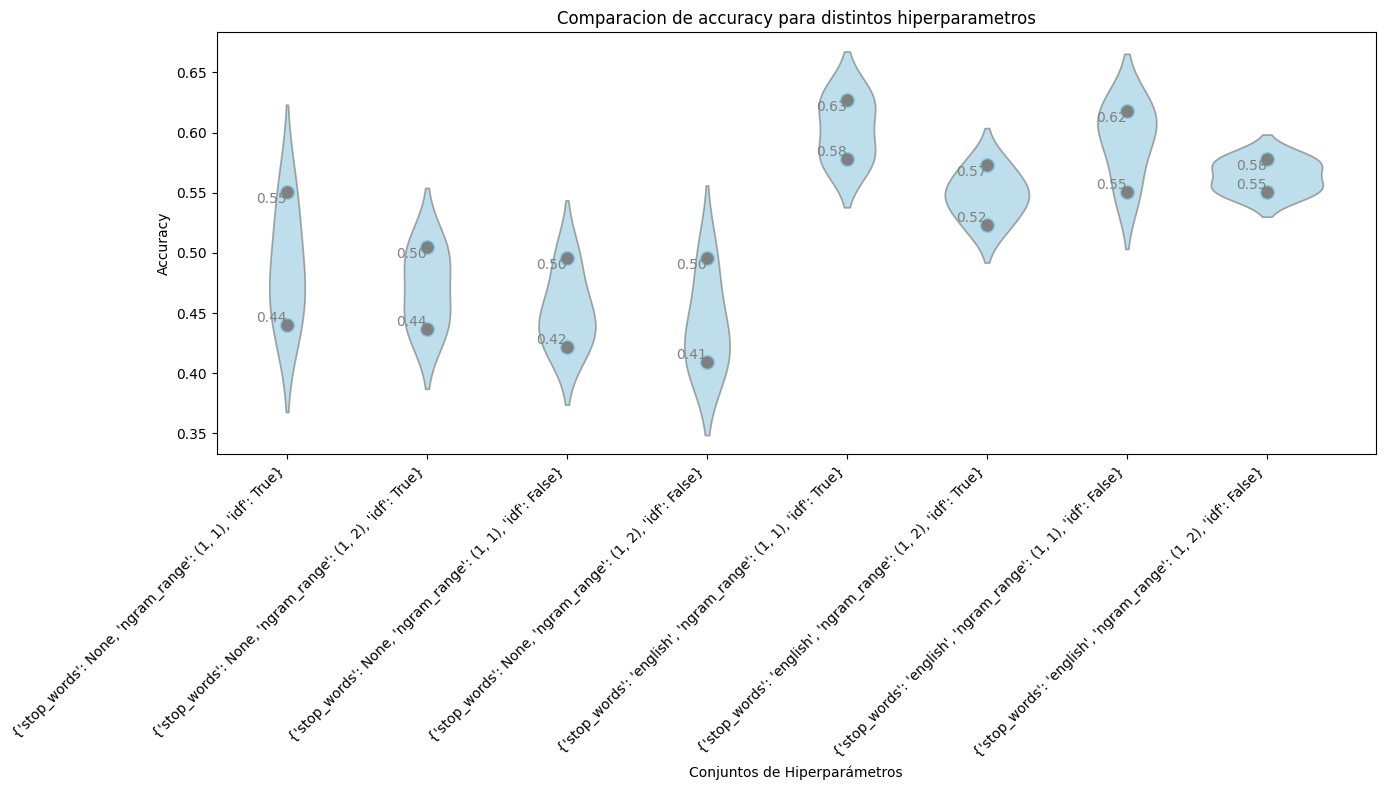

In [ ]:
import seaborn as sns
# Preparar datos para visualización
data = []
for params, accs in results:
    for acc in accs:
        data.append({"params": str(params), "accuracy": acc})

df = pd.DataFrame(data)

# Grafico violin
plt.figure(figsize=(14, 8))
sns.violinplot(x="params", y="accuracy", data=df, inner=None, color="skyblue", alpha=0.6)

# Marcar los valores mínimos y máximos
for i, params in enumerate(df['params'].unique()):
    subset = df[df['params'] == params]
    min_acc = subset['accuracy'].min()
    max_acc = subset['accuracy'].max()
    plt.scatter([i], [min_acc], color='gray', s=100, edgecolor='skyblue', zorder=3)
    plt.scatter([i], [max_acc], color='gray', s=100, edgecolor='skyblue', zorder=3)
    plt.text(i, min_acc, f'{min_acc:.2f}', ha='right', va='bottom', fontsize=10, color='gray')
    plt.text(i, max_acc, f'{max_acc:.2f}', ha='right', va='top', fontsize=10, color='gray')

plt.title("Comparacion de accuracy para distintos hiperparametros")
plt.xlabel("Conjuntos de Hiperparámetros")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




## Parte 2.3 - Seleccion modelo y entrenamiento completo

In [ ]:
# Seleccionar el mejor conjunto de hiperparámetros basado en la mayor precisión promedio
best_params = max(results, key=lambda x: np.mean(x[1]))[0]

print(f"Mejores parámetros seleccionados: {best_params}")


Mejores parámetros seleccionados: {'stop_words': 'english', 'ngram_range': (1, 1), 'idf': True}


In [ ]:
# Transformaciones a aplicar (featurizers) con los mejores parámetros
count_vect = CountVectorizer(stop_words=best_params["stop_words"], ngram_range=best_params["ngram_range"])
tf_idf = TfidfTransformer(use_idf=best_params["idf"])

# Ajustar y transformar todo el conjunto de entrenamiento
X_train_counts = count_vect.fit_transform(X_train)
X_train_tf = tf_idf.fit_transform(X_train_counts)

# Entrenar el modelo con el mejor conjunto de parámetros
bayes_clf = MultinomialNB()
bayes_clf.fit(X_train_tf, y_train)

MultinomialNB()

Final Accuracy: 0.5798
Final Classification Report:
                precision    recall  f1-score   support

        Antony       0.51      0.88      0.64        76
     Cleopatra       0.62      0.34      0.44        61
Queen Margaret       0.95      0.41      0.58        51

      accuracy                           0.58       188
     macro avg       0.69      0.55      0.55       188
  weighted avg       0.66      0.58      0.56       188



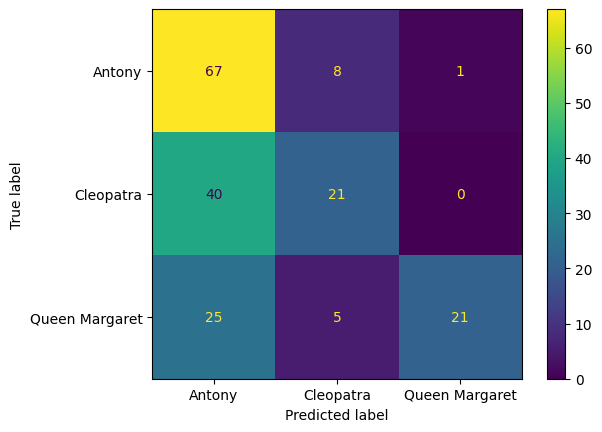

In [ ]:
# Transformar el conjunto de prueba
X_test_counts = count_vect.transform(X_test)
X_test_tf = tf_idf.transform(X_test_counts)

# Realizar predicciones
y_pred = bayes_clf.predict(X_test_tf)

# Calcular la precisión final
final_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Generar el reporte de clasificación
final_report = classification_report(y_test, y_pred, target_names=bayes_clf.classes_)
print("Final Classification Report:")
print(final_report)

# Generar y mostrar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bayes_clf.classes_)
disp.plot()
plt.show()


## Parte 2.4 - Modelo extra - Regresion Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Usando los mejores hiperparámetros
best_params = {"stop_words": 'english', "ngram_range": (1, 2), "idf": True}

# Transformaciones a aplicar con los mejores parámetros
count_vect = CountVectorizer(stop_words=best_params["stop_words"], ngram_range=best_params["ngram_range"])
tf_idf = TfidfTransformer(use_idf=best_params["idf"])

# Ajustar y transformar todo el conjunto de entrenamiento
X_train_counts = count_vect.fit_transform(X_train)
X_train_tf = tf_idf.fit_transform(X_train_counts)

# Entrenar el modelo de Regresión Logística
logreg_clf = LogisticRegression(max_iter=1000)
logreg_clf.fit(X_train_tf, y_train)

# Transformar el conjunto de prueba
X_test_counts = count_vect.transform(X_test)
X_test_tf = tf_idf.transform(X_test_counts)

# Realizar predicciones
y_pred_logreg = logreg_clf.predict(X_test_tf)

# Calcular la precisión final
final_accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Final Accuracy with Logistic Regression: {final_accuracy_logreg:.4f}")



Final Accuracy with Logistic Regression: 0.6117


Final Classification Report with Logistic Regression:
                precision    recall  f1-score   support

        Antony       0.54      0.86      0.66        76
     Cleopatra       0.66      0.44      0.53        61
Queen Margaret       0.88      0.45      0.60        51

      accuracy                           0.61       188
     macro avg       0.69      0.58      0.60       188
  weighted avg       0.67      0.61      0.60       188



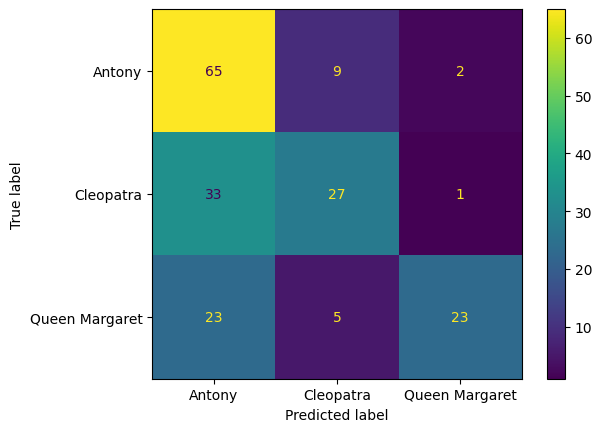

In [ ]:
# Generar el reporte de clasificación
final_report_logreg = classification_report(y_test, y_pred_logreg, target_names=logreg_clf.classes_)
print("Final Classification Report with Logistic Regression:")
print(final_report_logreg)

# Generar y mostrar la matriz de confusión
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg_clf.classes_)
disp_logreg.plot()
plt.show()


## Parte 2.5 - Modificacion de personaje

**Veo personajes con mas palabras para elegir uno del top**

In [ ]:
#chequeo que la copia de la parte 1.1 sigue ahi
df_dataset_copy

,CleanText,CharName,Title,GenreType
0,enter duke orsino curio and other lords mu...,(stage directions),Twelfth Night,Comedy
1,if music be the food of love play on give me...,Orsino,Twelfth Night,Comedy
2,will you go hunt my lord,Curio,Twelfth Night,Comedy
3,what curio,Orsino,Twelfth Night,Comedy
4,the hart,Curio,Twelfth Night,Comedy
...,...,...,...,...
35460,that she is living were it but told you shou...,Paulina,The Winter's Tale,Comedy
35461,you gods look down and from your sacred vials...,Hermione,The Winter's Tale,Comedy
35462,there's time enough for that lest they desire...,Paulina,The Winter's Tale,Comedy
35463,o peace paulina thou shouldst a husband tak...,Leontes,The Winter's Tale,Comedy


In [ ]:
#personajes con mas parrafos para elegir uno similar. Ayuda memoria: Antony 253 ; Cleopatra 204 ; Queen Margaret 169
df = df_dataset_copy["CharName"].value_counts()
df = df[df>170]
df.tail()

CharName
Coriolanus                                  189
Lear                                        188
Henry VI                                    183
Earl of Warwick                             182
Richard Plantagenet (Duke of Gloucester)    172
Name: count, dtype: int64

In [ ]:
#Nuevo dataset con nuevos personajes
# Usaremos sólo estos personajes
characters = ["Queen Margaret", "Coriolanus", "Lear"]
df_dataset_2 = df_dataset_copy[df_dataset_copy["CharName"].isin(characters)]

# Párrafos por cada personaje seleccionado
df_dataset_2["CharName"].value_counts()

CharName
Coriolanus        189
Lear              188
Queen Margaret    169
Name: count, dtype: int64

In [ ]:
X = df_dataset_2["CleanText"].to_numpy()
y = df_dataset_2["CharName"].to_numpy()
# Partir train/test 30% estratificados
# -> Definir X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state = 42)

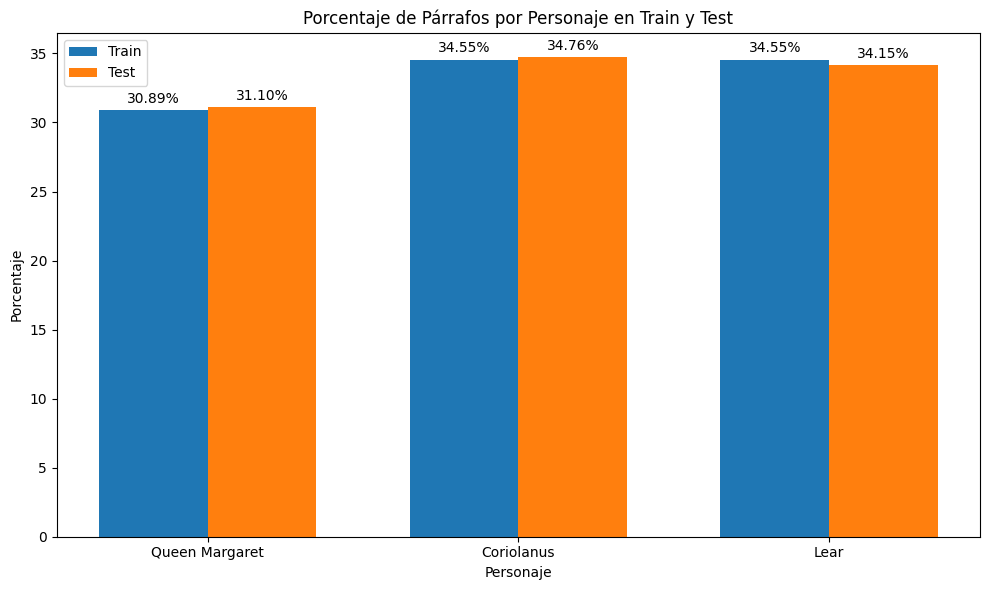

In [ ]:
#Viz que permita verificar que el balance de parrafos de cada personaje es similar en train y test
# Contamos el número de ocurrencias de cada personaje en los conjuntos de entrenamiento y prueba
train_counts = np.array([(y_train == char).sum() for char in characters])
test_counts = np.array([(y_test == char).sum() for char in characters])

# Calculamos los porcentajes
train_percentages = (train_counts / train_counts.sum()) * 100
test_percentages = (test_counts / test_counts.sum()) * 100

# Creación de la visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Datos para la visualización
labels = characters
x = np.arange(len(labels))  # Posición de los labels
width = 0.35  # Ancho de las barras

# Barras para train y test
rects1 = ax.bar(x - width/2, train_percentages, width, label='Train')
rects2 = ax.bar(x + width/2, test_percentages, width, label='Test')

# Añadimos etiquetas, título y leyenda
ax.set_xlabel('Personaje')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de Párrafos por Personaje en Train y Test')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Añadimos las etiquetas encima de las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de offset vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
#usamos mismos parametros para tf-idf
# Inicializamos el CountVectorizer con stop_words en inglés y rango de n-gramas (1,2)
count_vect = CountVectorizer(stop_words='english', ngram_range=(1, 2))

# Ajustamos y transformamos los datos de entrenamiento
X_train_counts = count_vect.fit_transform(X_train)

# Inicializamos el TfidfTransformer usando IDF
tf_idf = TfidfTransformer(use_idf=True)

# Ajustamos y transformamos los datos de entrenamiento a TF-IDF
X_train_tfidf_filtered = tf_idf.fit_transform(X_train_counts)

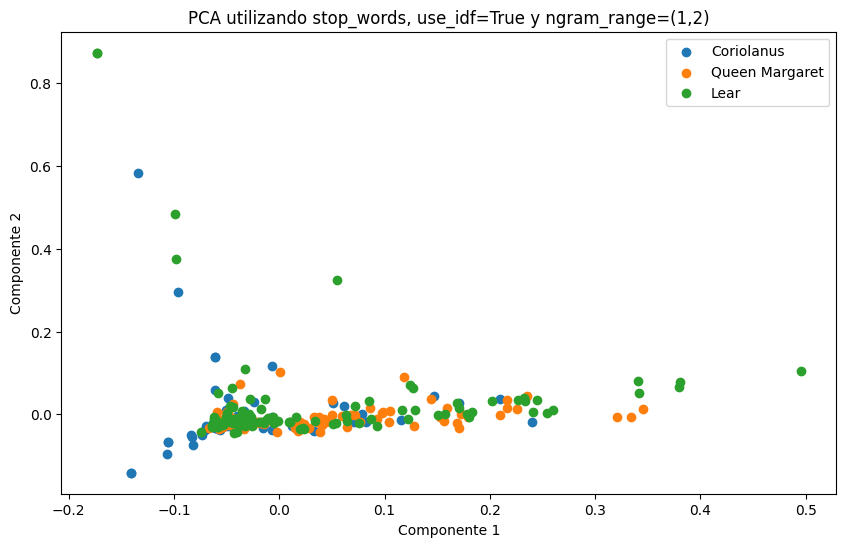

In [ ]:
# Aplicamos PCA para reducir las dimensiones a las dos primeras componentes principales
pca_filtered = PCA(n_components=2)
X_train_pca_filtered = pca_filtered.fit_transform(X_train_tfidf_filtered.toarray())

# Convertimos las dos primeras componentes a un DataFrame para facilitar la visualización
df_pca_filtered = pd.DataFrame(X_train_pca_filtered, columns=['PCA1', 'PCA2'])
df_pca_filtered['Character'] = y_train

# Visualizamos los datos en un mapa de dispersión
plt.figure(figsize=(10, 6))
for character in set(y_train):
    subset = df_pca_filtered[df_pca_filtered['Character'] == character]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=character)

plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('PCA utilizando stop_words, use_idf=True y ngram_range=(1,2)')
plt.legend()
plt.show()

## Parte 2.6 - Tecnica alternativa para extraer features

Una técnica alternativa para extraer features de texto es el uso de word embeddings. Los word embeddings son representaciones vectoriales densas de palabras en un espacio de características continuo, donde palabras con significados similares tienen representaciones vectoriales similares.
**Word2Vec:**

**Modelo CBOW (Continuous Bag of Words):**

Este modelo predice una palabra basada en su contexto (palabras vecinas). Toma una ventana de palabras alrededor de una palabra objetivo y utiliza estas palabras para predecir la palabra objetivo. El modelo aprende a representar cada palabra en un espacio de alta dimensionalidad.

**Modelo Skip-Gram:**

Este modelo hace lo contrario: toma una palabra objetivo y trata de predecir sus palabras vecinas. Es eficaz para aprender representaciones útiles incluso con pocas muestras.

**Diferencias Esperadas en los Resultados**

**Captura de Semántica y Contexto:**

Los word embeddings capturan mejor las relaciones semánticas y contextuales entre palabras. Mientras que TF-IDF representa cada palabra de forma independiente, los embeddings permiten que el modelo entienda similitudes y relaciones entre palabras, mejorando la capacidad para capturar el significado de las oraciones.

**Reducción de Dimensionalidad:**

Los embeddings generan vectores densos de menor dimensionalidad en comparación con las representaciones dispersas y de alta dimensionalidad de TF-IDF. Esto puede reducir el costo computacional y mejorar la eficiencia del modelo.

**Robustez en Datos Desbalanceados:**

Los embeddings pueden proporcionar características más robustas que mejoran la clasificación de clases minoritarias, ya que capturan mejor la información semántica que puede ser útil para distinguir entre clases.

**Desempeño en Tareas Complejas:**

Para tareas de procesamiento de lenguaje natural (NLP) más complejas, como análisis de sentimientos, traducción automática y preguntas y respuestas, los embeddings basados en modelos como BERT han demostrado un rendimiento superior debido a su capacidad para entender el contexto completo.

In [ ]:
###implementacion basica word2vec
from gensim.models import Word2Vec
import numpy as np

# Preprocesar los datos
sentences = [text.split() for text in df_dataset['CleanText']]

# Entrenar el modelo Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Obtener los embeddings de las palabras
def get_sentence_embedding(sentence, model):
    words = sentence.split()
    embedding = np.mean([model.wv[word] for word in words if word in model.wv], axis=0)
    return embedding

# Aplicar los embeddings al conjunto de datos
X_embeddings = np.array([get_sentence_embedding(text, word2vec_model) for text in df_dataset['CleanText']])
y = df_dataset['CharName'].to_numpy()

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_embed, X_test_embed, y_train_embed, y_test_embed = train_test_split(X_embeddings, y, test_size=0.3, stratify=y, random_state=42)

# Entrenar un clasificador con las nuevas características
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_embed, y_train_embed)

# Evaluar el rendimiento
y_pred_embed = clf.predict(X_test_embed)
print(classification_report(y_test_embed, y_pred_embed))


                precision    recall  f1-score   support

        Antony       0.40      0.91      0.55        76
     Cleopatra       0.20      0.05      0.08        61
Queen Margaret       0.00      0.00      0.00        51

      accuracy                           0.38       188
     macro avg       0.20      0.32      0.21       188
  weighted avg       0.23      0.38      0.25       188



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Conclusiones**
El uso de word embeddings como Word2Vec, GloVe o BERT puede mejorar significativamente la capacidad de un modelo para entender y procesar texto, proporcionando representaciones de características más ricas y contextualmente informadas en comparación con técnicas tradicionales como TF-IDF. Esta mejora en la calidad de las características suele traducirse en un mejor rendimiento en diversas tareas de NLP.
El uso de Word2Vec en este caso específico no mejoró el rendimiento del modelo en comparación con Naive Bayes Multinomial y Regresión Logística. Las técnicas de embeddings como Word2Vec pueden requerir un ajuste más fino y un preprocesamiento adicional para ser efectivas. Además, el contexto y la calidad del corpus de entrenamiento pueden influir significativamente en los resultados. Las técnicas basadas en TF-IDF combinadas con modelos como Regresión Logística parecen ser más efectivas para este conjunto de datos y tarea de clasificación específica.

In [ ]:
pip install transformers

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Cargar el modelo y el tokenizador preentrenado de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Función para obtener los embeddings de BERT
def get_bert_embeddings(texts):
    embeddings = []
    with torch.no_grad():
        for text in texts:
            inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
            outputs = model(**inputs)
            # Promediar los embeddings de las últimas capas ocultas
            last_hidden_states = outputs.last_hidden_state
            embeddings.append(torch.mean(last_hidden_states, 1).squeeze().numpy())
    return embeddings

# Preparar los datos
X = df_dataset['CleanText'].to_numpy()
y = df_dataset['CharName'].to_numpy()

# Obtener los embeddings de BERT
X_bert = get_bert_embeddings(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, y, test_size=0.3, stratify=y, random_state=42)

# Entrenar un clasificador de regresión logística
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_bert, y_train_bert)

# Evaluar el rendimiento
y_pred_bert = clf.predict(X_test_bert)
accuracy_bert = accuracy_score(y_test_bert, y_pred_bert)
print(f"Final Accuracy with BERT: {accuracy_bert:.4f}")

# Generar el reporte de clasificación
final_report_bert = classification_report(y_test_bert, y_pred_bert, target_names=clf.classes_)
print("Final Classification Report with BERT:")
print(final_report_bert)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Final Accuracy with BERT: 0.5532
Final Classification Report with BERT:
                precision    recall  f1-score   support

        Antony       0.54      0.64      0.59        76
     Cleopatra       0.44      0.36      0.40        61
Queen Margaret       0.70      0.65      0.67        51

      accuracy                           0.55       188
     macro avg       0.56      0.55      0.55       188
  weighted avg       0.55      0.55      0.55       188



BERT demoro un poco y tampoco hubo mayores mejoras en terminios de accuracy

##Parte 2.7 - (Opcional) Comparativa con Fasttext


In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 730.2 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4239657 sha256=4b2e465a298e1d77eff89dda9b64458bc45dd0618067ca6fdcd2d335e519b4d9
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
import fasttext

# Convertimos al formato de fasttext: archivo de texto donde cada línea es:
# __label__<label> TEXTO
# Convertir las etiquetas a un formato adecuado para fastText
y_train_s = np.char.replace(y_train.astype(str), " ", "_").astype(object)
y_test_s = np.char.replace(y_test.astype(str), " ", "_").astype(object)

# Crear el directorio de datos si no existe
data_dir = Path("./fasttext_data")
data_dir.mkdir(exist_ok=True)

Xytrains = "__label__" + y_train_s.astype(object) + " " + X_train
Xytests = "__label__" + y_test_s.astype(object) + " " + X_test
np.savetxt(data_dir / "train.txt", Xytrains, fmt="%s")
np.savetxt(data_dir / "test.txt", Xytests, fmt="%s")

Xytests[0]

"__label__Lear death  traitor  nothing could have subdu'd nature to such a lowness but his unkind daughters  is it the fashion that discarded fathers should have thus little mercy on their flesh  judicious punishment  'twas this flesh begot those pelican daughters "

In [ ]:
# Entrenar el modelo de fastText
model = fasttext.train_supervised(input=str(data_dir / "train.txt"), epoch=100, wordNgrams=2)

# Evaluar el modelo de fastText
result = model.test(str(data_dir / "test.txt"))
print(f"Accuracy: {result[1]:.4f}")

Accuracy: 0.6402


In [ ]:
# Predecir en el conjunto de prueba
y_out = model.predict(list(X_test))
y_pred_test = [y[0].replace("__label__", "") for y in y_out[0]]

# Calcular las métricas de evaluación
final_accuracy_fasttext = accuracy_score(y_test, y_pred_test)
print(f"Final Accuracy with fastText: {final_accuracy_fasttext:.4f}")

Final Accuracy with fastText: 0.4390


Final Classification Report with fastText:
                precision    recall  f1-score   support

    Coriolanus       0.54      0.75      0.63        57
          Lear       0.72      0.52      0.60        56
Queen_Margaret       0.75      0.65      0.69        51

      accuracy                           0.64       164
     macro avg       0.67      0.64      0.64       164
  weighted avg       0.67      0.64      0.64       164



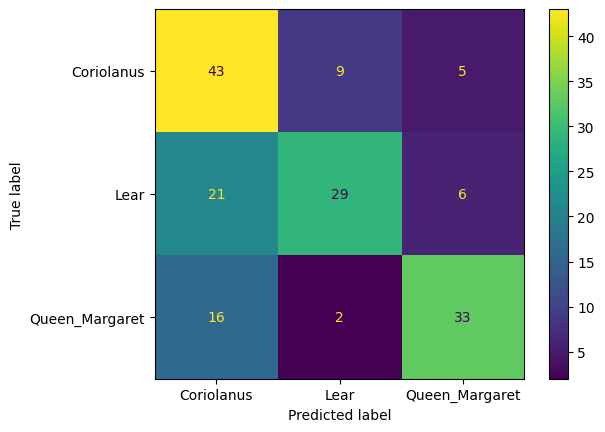

In [ ]:
# Generar el reporte de clasificación
final_report_fasttext = classification_report(y_test_s, y_pred_test, target_names=np.unique(y_train_s))
print("Final Classification Report with fastText:")
print(final_report_fasttext)

# Generar y mostrar la matriz de confusión
cm_fasttext = confusion_matrix(y_test_s, y_pred_test, labels=np.unique(y_train_s))
disp_fasttext = ConfusionMatrixDisplay(confusion_matrix=cm_fasttext, display_labels=np.unique(y_train_s))
disp_fasttext.plot()
plt.show()